# Introduction to Matplotlib

Matplotlib is a powerful visualization package in python. 

### Goals

- Get familiar with plotting basics and controlling aspects of the graph
- Plot multi-panel plots
- Use basemap and cartopy to plot data on maps


### Requirements 

To use this notebook, you will need to install matplotlib in your conda environment with the following command:

```
conda install -c conda-forge matplotlib
conda install -c anaconda basemap numpy
```


This notebook follows along with the content at https://matplotlib.org/stable/tutorials/introductory/usage.html


### Basemap vs Cartopy

Basemap is deprecated in favor of cartopy, but you may be seeing quite a few legacy scripts around GSL still using Basemap pretty heavily, so there are examples of both here.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.basemap import Basemap


%matplotlib inline

In [ ]:
# The first plot

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y);

# a semi-colon after the last item will supress its output


In [ ]:
help(plt.scatter)

In [ ]:
help(ax.set_title)

In [ ]:
# Another cool example with fewer defaults
# XKCD colors are here: https://xkcd.com/color/rgb/

np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100


# Control the size of the plot here
fig, ax = plt.subplots(figsize=(8, 7))

# use the help(plt.scatter) function for all the scatter plot controls
# Here we set the color and size with c and s
# We are plotting the a values on the x axis, and b values on the y axis
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a', fontsize=18)
ax.set_ylabel('entry b')
ax.set_title('Bubble Plot', fontsize=25, color='xkcd:magenta');




# Anatomy of a figure

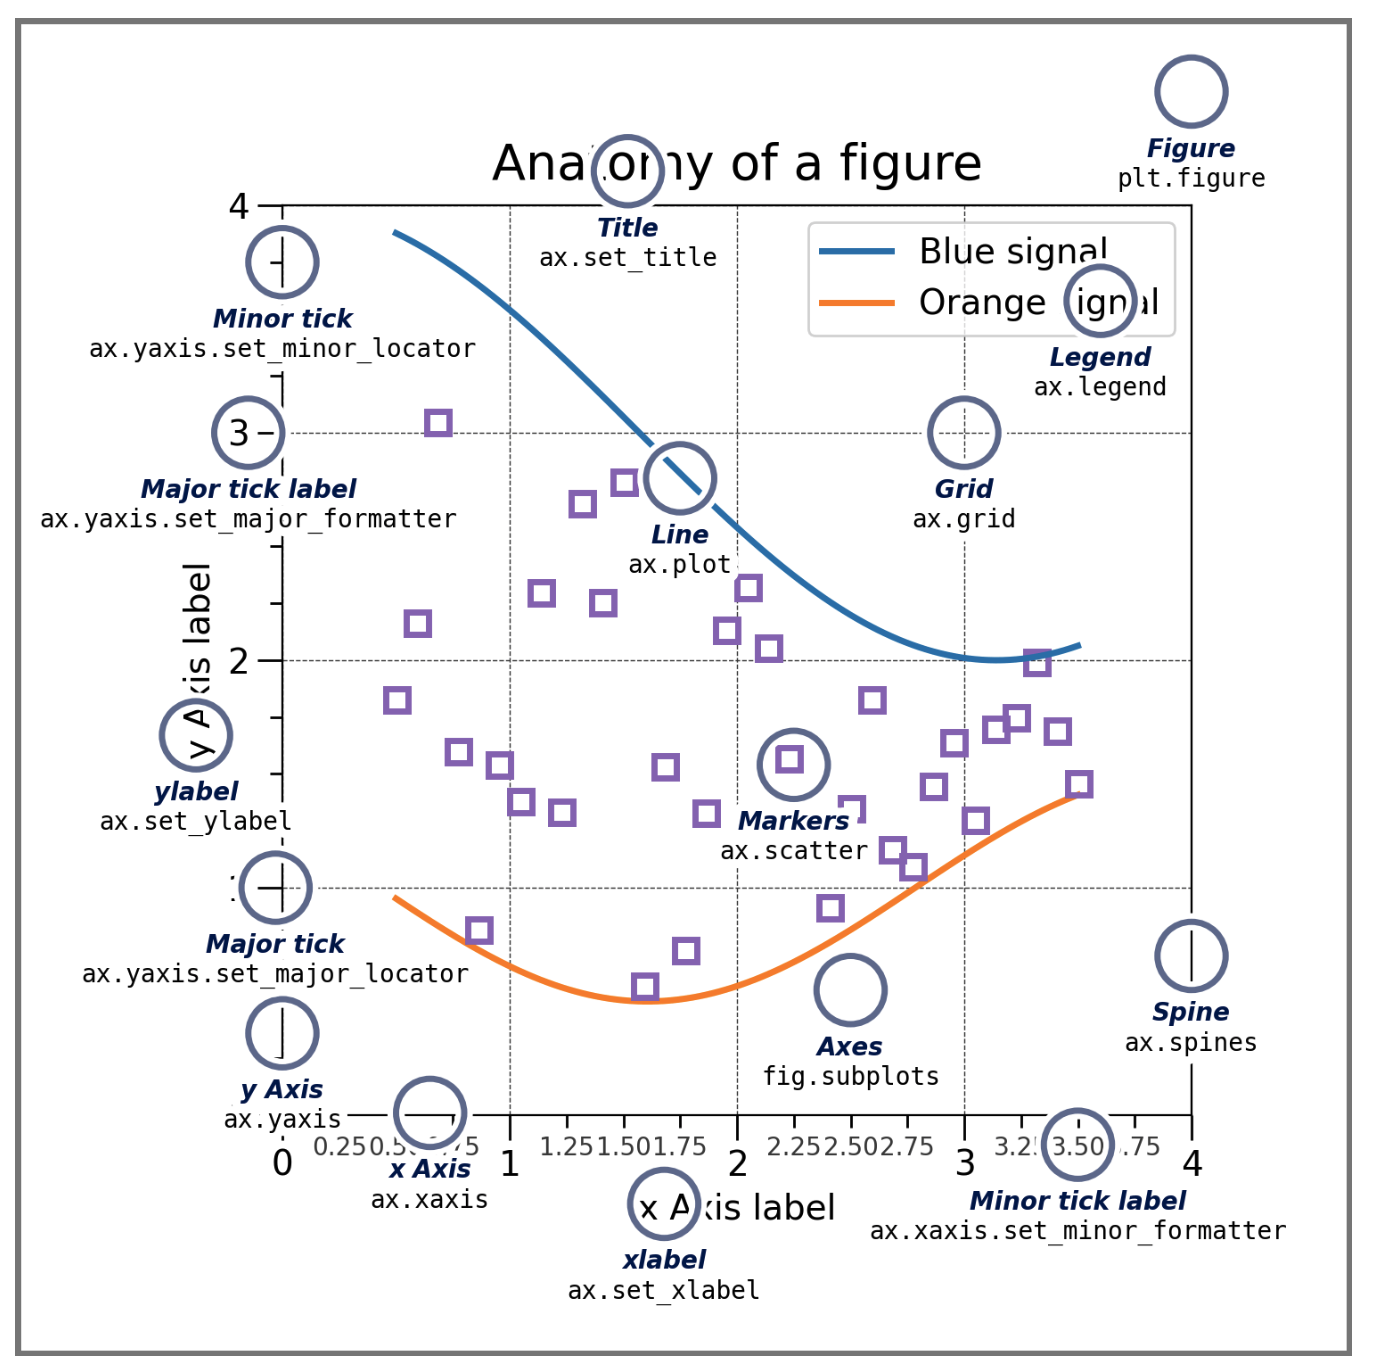


In [ ]:
# Adding a legend
# Line plot example

x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.


# Exercise
# 1. Change the title to say "Common Math Curves"
# 2. Change the size of the graph.
# 3. Increase the size of the legend.
# 4. Change the colors of the lines
# 5. Change the x and y labels to something useful with units.
# 6. Change one line to be dashed
# 7. Plot only data points with now lines
# 8. Check out how the lines change with fewer data points




In [ ]:
# A historgram example

mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(12, 8))
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')

# Add text to the plot, use a mathematical expression
ax.text(75, .025, r'$\mu={mu},\ \sigma={sigma}$'.format(mu=115, sigma=15))

# Set the axis limits: [x0, x1, y0, y1]
ax.axis([55, 175, 0, 0.03])

ax.set_xticks(np.arange(55, 175, 10))

ax.grid(True);


# Exercise:
# Use a python format string to provide mu and sigma via variable
# Change the color of the grid
# Change the tick marks on the x axis to show up every 10 bins


In [ ]:
# Panels and color-mapped data


# Set up some data to plot
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets

# Set up a 4-panel plot
# axs is now an array of axes, one for each panel
fig, axs = plt.subplots(2, 2, figsize=(12, 12))


# Top left (axis 0, 0)
# Colormesh assigns a color value to each grid point
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')


# Top right (0, 1)
# Contourf is a filled contour -- often what we use in meteorology
co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

# Bottom left (1, 0)
# imshow displays 2d data as an image
pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both') # extend gives us the little triangle ends.
axs[1, 0].set_title('imshow() with LogNorm()')


# Bottom right (1,1)
# scatter plot shows individual data points
pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()');

# Exercise
# - Change the ticks and colors on the contourf colorbar to be every 0.25 units
# - Change the position, size, and orientation of each colorbar -- no need to make them neat.
# - Add a general figure title (not the small ones over the panels)

In [ ]:
# Create a map with some data on it using Basemap

# Set up a map like HRRR CONUS -- lambert conformal 
my_map = Basemap(llcrnrlon=-123.,llcrnrlat=20.,
               urcrnrlon=-59., urcrnrlat=48., 
               projection='lcc', 
               lat_1=38.5,
               lat_0=38.5,
               lon_0=-97.5,
               resolution='l')

# draw coastlines, country boundaries, fill continents.
my_map.drawcoastlines(linewidth=0.25)
my_map.drawcountries(linewidth=0.25)
my_map.fillcontinents(color='coral',lake_color='aqua')



# draw the edge of the map projection region (the projection limb)
my_map.drawmapboundary(fill_color='aqua')
my_map.drawstates()

# draw lat/lon grid lines every 30 degrees.
my_map.drawmeridians(np.arange(0,360,30))
my_map.drawparallels(np.arange(-90,90,30))


# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)



# compute native map projection coordinates of lat/lon grid.
x, y = my_map(lons*180./np.pi, lats*180./np.pi)


# contour data over the map.
cs = my_map.contour(x, y, wave + mean, 15, linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()


In [ ]:
# Cartopy example
# Cartopy has some great examples here: https://scitools.org.uk/cartopy/docs/latest/gallery/index.html
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Same projection information as Basemap
data_projection = ccrs.LambertConformal(central_longitude=-97.5,central_latitude=38.5)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

# Set the extent of the domain here instead of in projection like Basemap.
extent = [-123, -59, 20, 48]
ax.set_extent(extent)

# Add coastline, states, countries, gridlines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.gridlines()


ax.contour(x, y, wave + mean, 15, linewidths=1.5,
            transform=data_projection,
            cmap='nipy_spectral');

# Gotcha! Grids may be handled differently bet ween each of these


In [ ]:
lons*180./np.pi - 180

In [ ]:
-lats*180./np.pi